## TODO
1. Линейная регрессия вручную и не вручную.
Берем пару параметров (н-р, температуру и давление). Смотрим как обуславливается давление температурой и тп.
Также нужно попробовать несколько независимых и один зависимый фактор (для множественной регресии можно просто оценить коэффициенты регрессии без графика, но лучше с ним)
2. ARIMA
Не вручную, обучение, замер точности, небольшой прогноз (шагов до 20-30) и проверка его точности. 
Параметр выбираем сами

![image](https://miro.medium.com/max/720/0*IGqLI40YDrnbmOsZ.jpg)

In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.options.mode.chained_assignment = None 

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

In [11]:
df = pd.DataFrame(boston.data)

In [12]:
df.head(
)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## Работа с столбцами


Названия столбцов:
* CRIM - преступность на душу населения уровень преступности по городам
* ZN - доля жилой земли, зонированной на участки площадью более 25 000 кв.футов.
* INDUS - Доля промышленных площадей, не связанных с розничной торговлей, в расчете на один город
* CHAS  - Фиктивная переменная реки Чарльз (= 1, если тракт граничит с рекой; 0 в противном случае)
* NOX - Концентрация оксидов азота (частей на 10 миллионов)
* RM - среднее количество комнат в жилом помещении
* AGE - доля возрастных квартир, занятых владельцами, построенных до 1940 года
* DIS - Взвешенные расстояния до пяти бостонских центров занятости 
* RAD - индекс доступности к радиальным магистралям
* TAX - налог на недвижимость с полной стоимостью - ставка налога за 10 000 долларов США
* PTRATIO - Соотношение учащихся и учителей в разбивке по городам
* B1000(Bk - 0,63)^2, где Bk - доля чернокожих по городам
* LSTAT % - более низкий статус населения

In [13]:
# Добавление названий столбцов в датафрейм
df.columns = boston.feature_names
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [14]:
# Добавляем целевую переменную - таргет - в наш датафрейм
# Где таргет - Средняя стоимость домов в 1000 долларов, которые заняты владельцами
df["PRICE"] = boston.target

In [15]:
df.shape

(506, 14)

In [16]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'PRICE'],
      dtype='object')

In [9]:
df.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [17]:
# Определим количество уникальных значений в каждом столбце
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

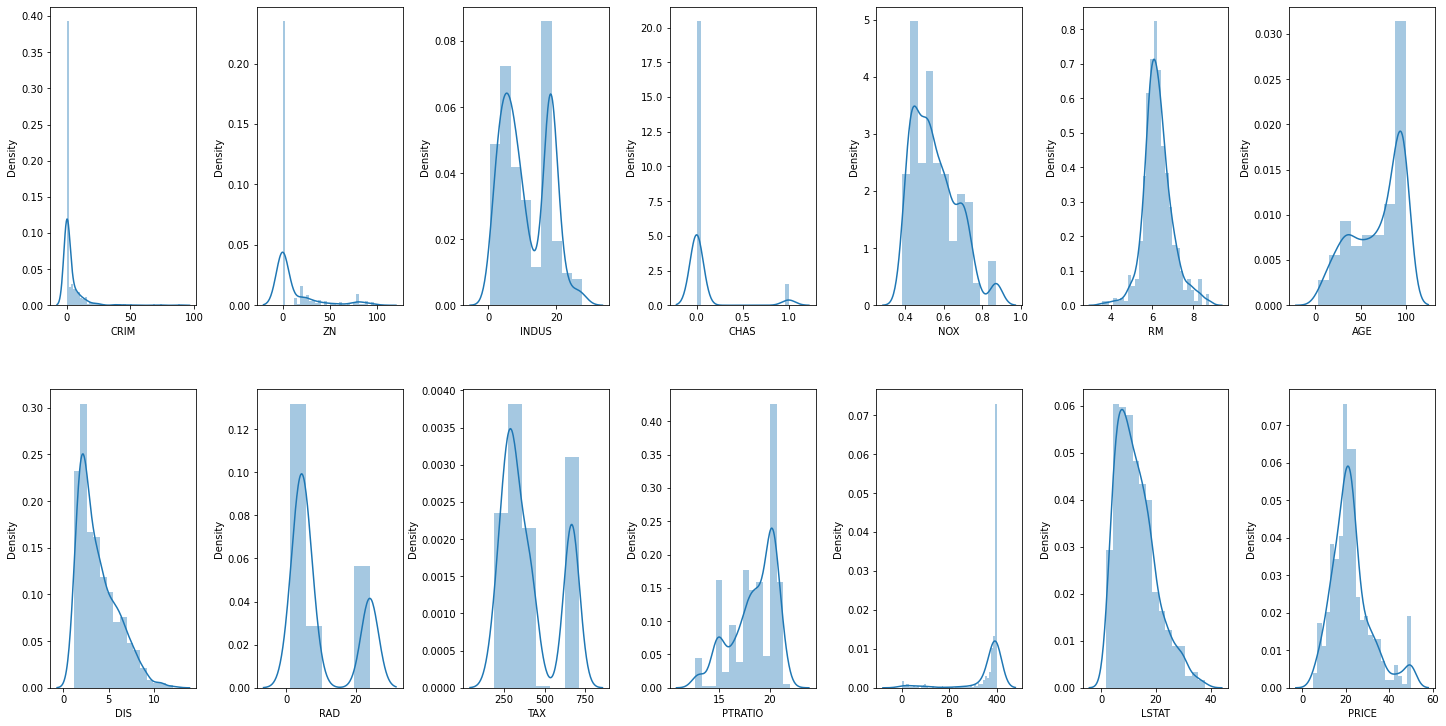

In [18]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### Проверка данных

In [19]:
# Проверка на Null-type
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [20]:
# Проверка строк на пропущенные данные 
df[df.isnull().any(axis=1)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


In [23]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Корреляция

In [15]:
dfcor = df.corr()
dfcor.shape

(14, 14)

<AxesSubplot:>

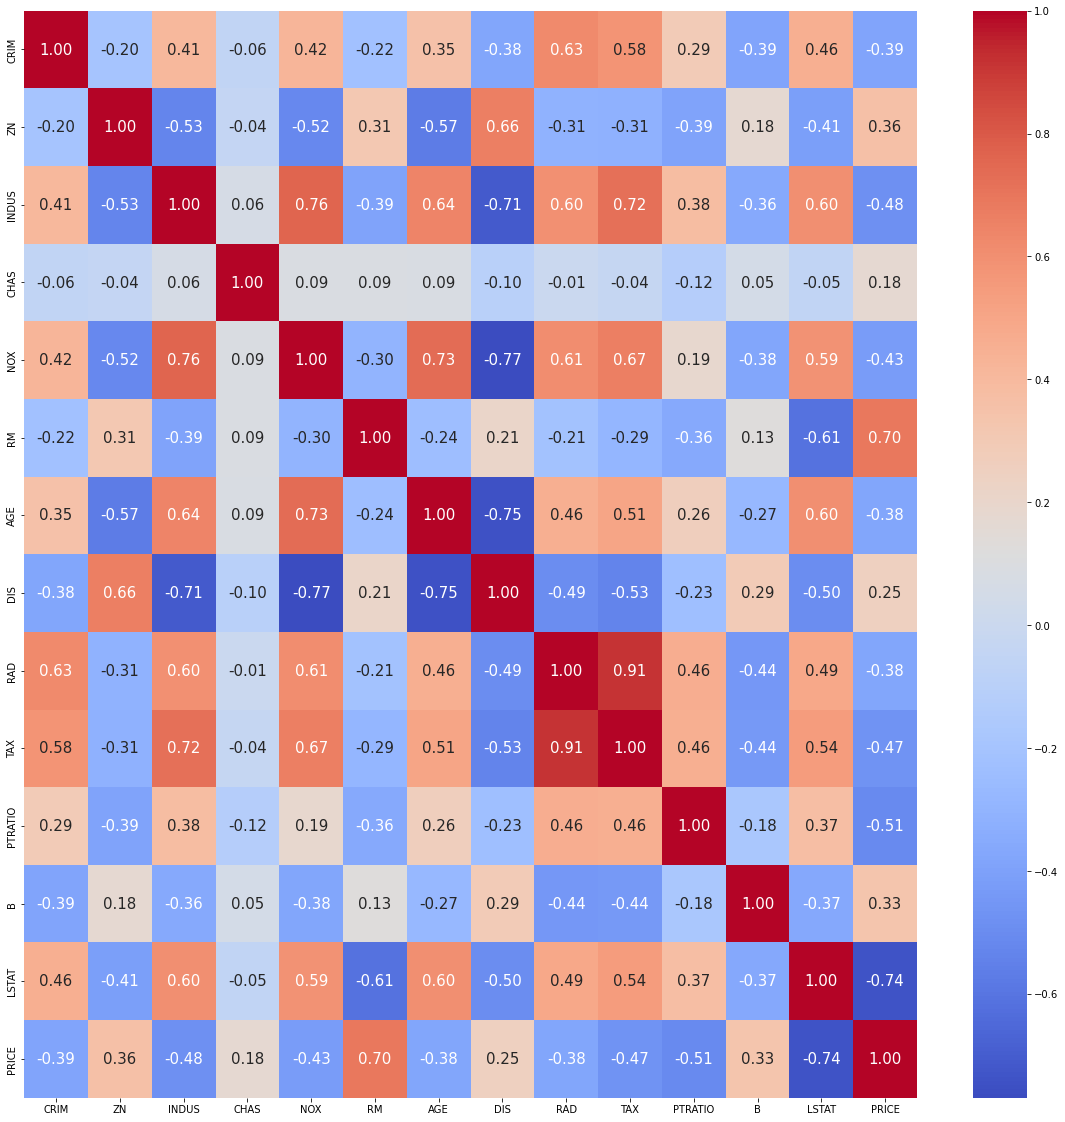

In [16]:
plt.figure(figsize=(20,20))
sns.heatmap(dfcor, cbar=True, fmt=".2f", annot=True, annot_kws={"size":15}, cmap="coolwarm")

## Линейная регрессия

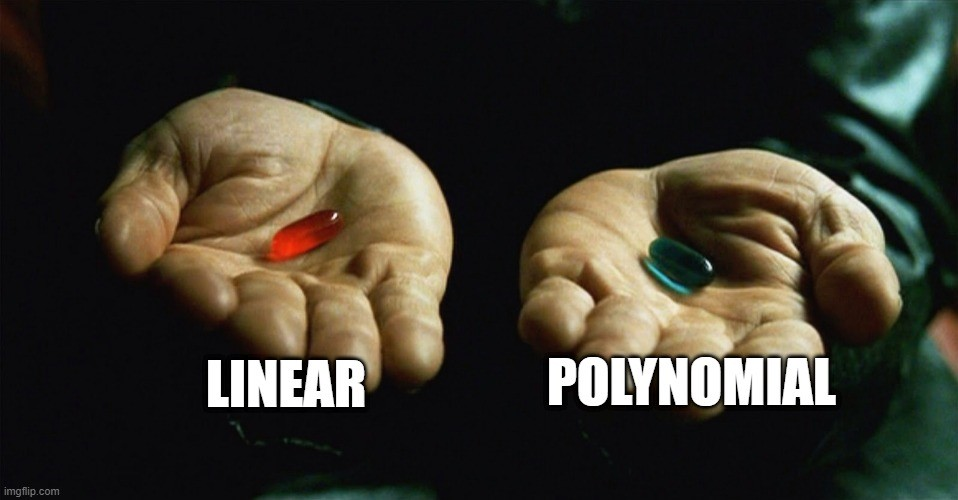

### Получение данных для обучения и тестирования линейной регрессии
,где X - независимые факторы, а y - зависимый фактор

In [17]:
X_lr = df["RM"]
y_lr = df["PRICE"]

In [18]:
X_lr = np.array(X_lr).reshape(-1,1)
y_lr = np.array(y_lr).reshape(-1,1)

In [19]:
from sklearn.model_selection import train_test_split

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.3, random_state=42)

#### Обучение модели

In [20]:
from sklearn.linear_model import LinearRegression

LR_lr = LinearRegression()

LR_lr.fit(X_train_lr, y_train_lr)

LinearRegression()

In [21]:
print(X_train_lr.shape, y_train_lr.shape) # Размерность обучающей модели

print(X_test_lr.shape, y_test_lr.shape) # Размерность тестовой выборки

(354, 1) (354, 1)
(152, 1) (152, 1)


In [22]:
LR_lr.intercept_ # коэф смещения пересечения с осью y

array([-34.66230744])

#### Делаем прогноз

In [23]:
y_pred_lr = LR_lr.predict(X_train_lr)

In [24]:
y_pred_lr.shape

(354, 1)

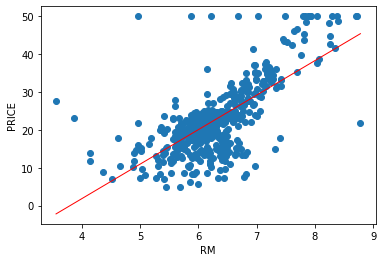

In [25]:
prediction_space = np.linspace(min(X_lr), max(X_lr)).reshape(-1,1) 
plt.scatter(X_lr, y_lr)
plt.plot(prediction_space, LR_lr.predict(prediction_space), color = 'red', linewidth = 1)
plt.ylabel('PRICE')
plt.xlabel("RM")
plt.show()

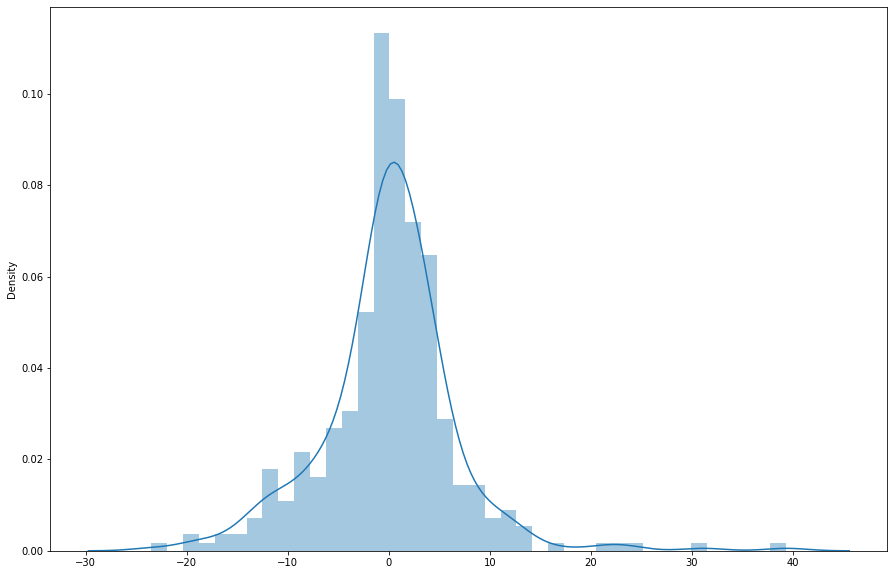

In [26]:
# Проверка нормальности ошибок
plt.figure(figsize=(15,10))
sns.distplot(y_train_lr - y_pred_lr)
plt.show()

#### Оценка точности модели

* 𝑅^2 : Это мера линейной зависимости между X и Y. Она интерпретируется как доля дисперсии в зависимой переменной, которая предсказуема по независимой переменной.

* Adjusted  𝑅^2 : Скорректированный R-квадрат сравнивает объясняющую силу регрессионных моделей, содержащих разное количество предикторов.

- Почему adj R^2 лучше: Эта статистика представляет собой обычный R-квадрат, но со штрафом за большое количество предикторов. Основная идея: если новые независимые переменные дают большой вклад в качество модели, значение этой статистики растет, если нет — то наоборот уменьшается.

* MAE : Это среднее значение абсолютного значения ошибок. Оно измеряет разницу между двумя непрерывными переменными (фактическими и прогнозируемыми значениями y.

* MSE: Это среднеквадратичная ошибка 

* RMSE: Это квадратный корень из среднеквадратичной ошибки

#### Оценка обучаемой выборки

In [27]:
print(y_pred_lr[:5])

[[23.96708969]
 [21.65109173]
 [17.14674925]
 [19.4536291 ]
 [19.37156618]]


In [28]:
print('R^2:',metrics.r2_score(y_train_lr, y_pred_lr).round(2))
print('Adjusted R^2:', (1 - (1 - metrics.r2_score(y_train_lr, y_pred_lr)) * (len(y_train_lr)-1) / (len(y_train_lr) - X_train_lr.shape[1]-1)).round(2))
print('MAE:',metrics.mean_absolute_error(y_train_lr, y_pred_lr))
print('MSE:',metrics.mean_squared_error(y_train_lr, y_pred_lr))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train_lr, y_pred_lr)))

R^2: 0.49
Adjusted R^2: 0.49
MAE: 4.5030631562319705
MSE: 45.01275449524406
RMSE: 6.709154529092623


#### Оценка тестовой выборки

In [29]:
y_test_pred_lr = LR_lr.predict(X_test_lr)
print(y_test_pred_lr[:5])

[[23.83943626]
 [26.95782721]
 [19.89129801]
 [20.63898239]
 [22.7543821 ]]


In [30]:
acc_linreg = metrics.r2_score(y_test_lr, y_test_pred_lr)
print('R^2:', acc_linreg.round(2))
print('Adjusted R^2:', (1 - (1-metrics.r2_score(y_test_lr, y_test_pred_lr))*(len(y_test_lr)-1)/(len(y_test_lr)-X_test_lr.shape[1]-1)).round(2))
print('MAE:',metrics.mean_absolute_error(y_test_lr, y_test_pred_lr))
print('MSE:',metrics.mean_squared_error(y_test_lr, y_test_pred_lr))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test_lr, y_test_pred_lr)))

R^2: 0.46
Adjusted R^2: 0.45
MAE: 4.314224104076755
MSE: 40.35144969787305
RMSE: 6.352279094771659


### Получение данных для обучения и тестирования множественной регрессии (вся таблица)
,где X - независимые факторы, а y - зависимый фактор

<AxesSubplot:>

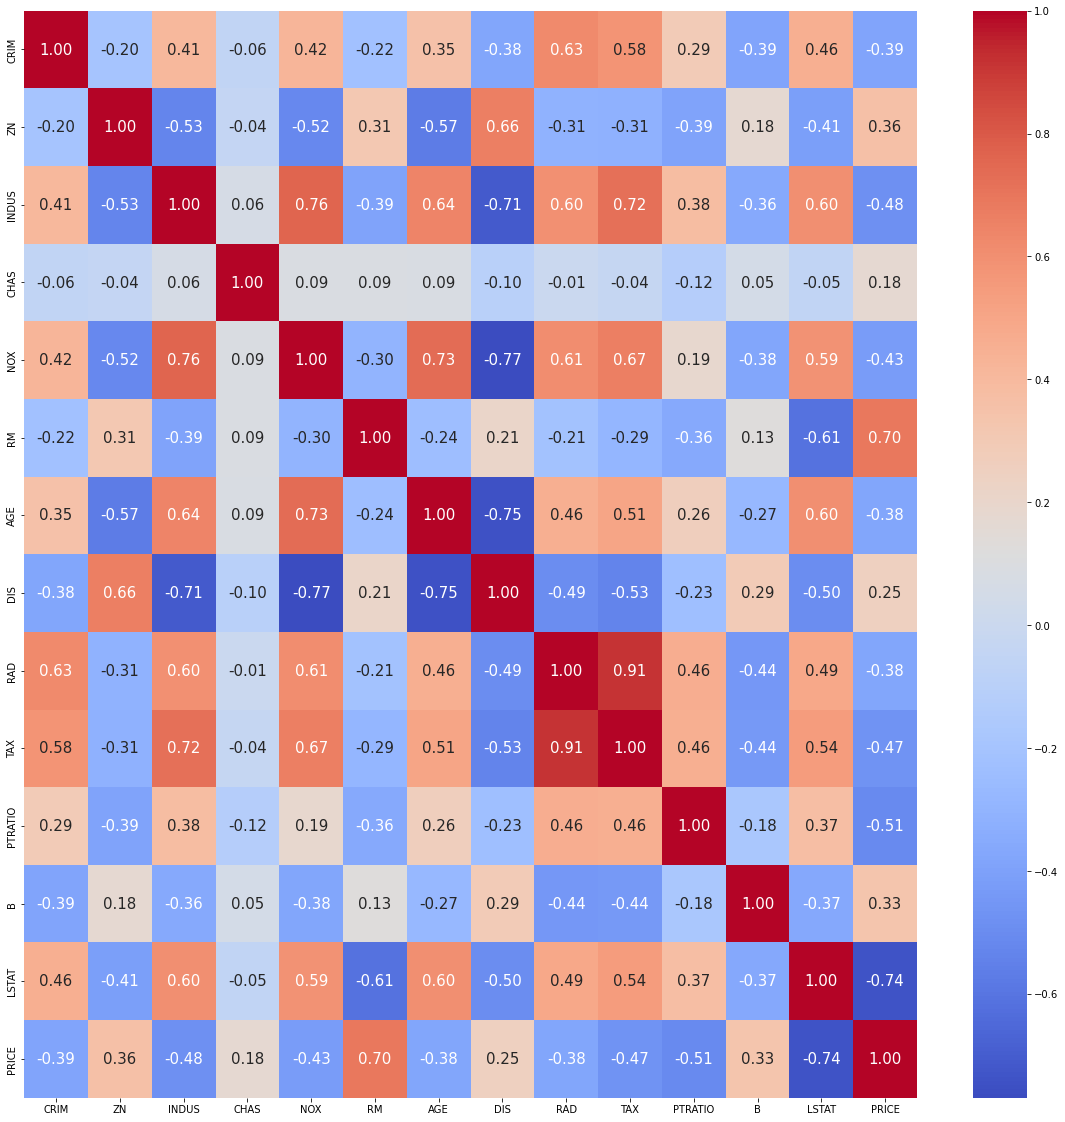

In [31]:
plt.figure(figsize=(20,20))
sns.heatmap(dfcor, cbar=True, fmt=".2f", annot=True, annot_kws={"size":15}, cmap="coolwarm")

In [32]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [33]:
X = df.drop(["PRICE"], axis=1)
y = df["PRICE"]

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Обучение модели

In [35]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()

LR.fit(X_train, y_train)

LinearRegression()

In [36]:
print(X_train.shape, y_train.shape) # Размерность обучающей модели

print(X_test.shape, y_test.shape) # Размерность тестовой выборки

(354, 13) (354,)
(152, 13) (152,)


In [37]:
LR.intercept_ # коэф смещения пересечения с осью y

31.631084035694286

In [38]:
# Создадим датафрейм со всеми коэффициентами наклона
coev = pd.DataFrame([X_train.columns, LR.coef_]).T
coev = coev.rename(columns = {0: "Переменные", 1: "Коэффициенты"})
coev

,Переменные,Коэффициенты
0,CRIM,-0.13347
1,ZN,0.035809
2,INDUS,0.049523
3,CHAS,3.119835
4,NOX,-15.417061
5,RM,4.057199
6,AGE,-0.010821
7,DIS,-1.385998
8,RAD,0.242727
9,TAX,-0.008702


#### Делаем прогноз

In [39]:
y_pred = LR.predict(X_train)

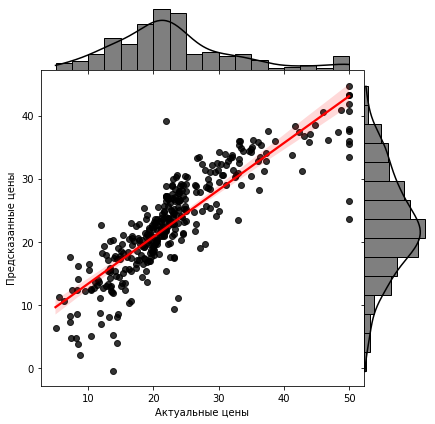

In [40]:
sns.jointplot(x = y_train, y = y_pred, data=X_train, space = 0, kind='reg', color = "black", joint_kws={'line_kws':{'color':'red'}})
# подпишем оси координат
plt.xlabel("Актуальные цены")
plt.ylabel("Предсказанные цены")
plt.show()

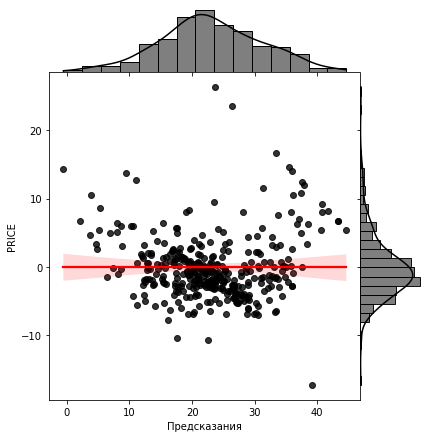

In [41]:
sns.jointplot(x = y_pred, y = y_train-y_pred, data=X_train, space = 0, kind='reg', color = "black", joint_kws={'line_kws':{'color':'red'}})
# подпишем оси координат
plt.title("Предсказания vs остатки")
plt.xlabel("Предсказания")
plt.show()

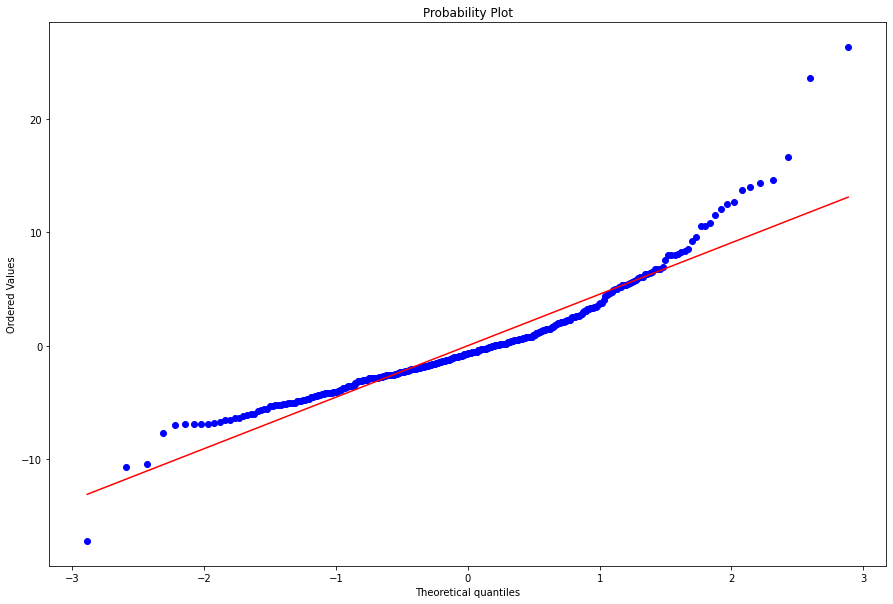

In [42]:
import scipy.stats as stats
import pylab 
plt.figure(figsize=(15,10))
stats.probplot(y_train - y_pred, dist="norm", plot=pylab)
pylab.show()

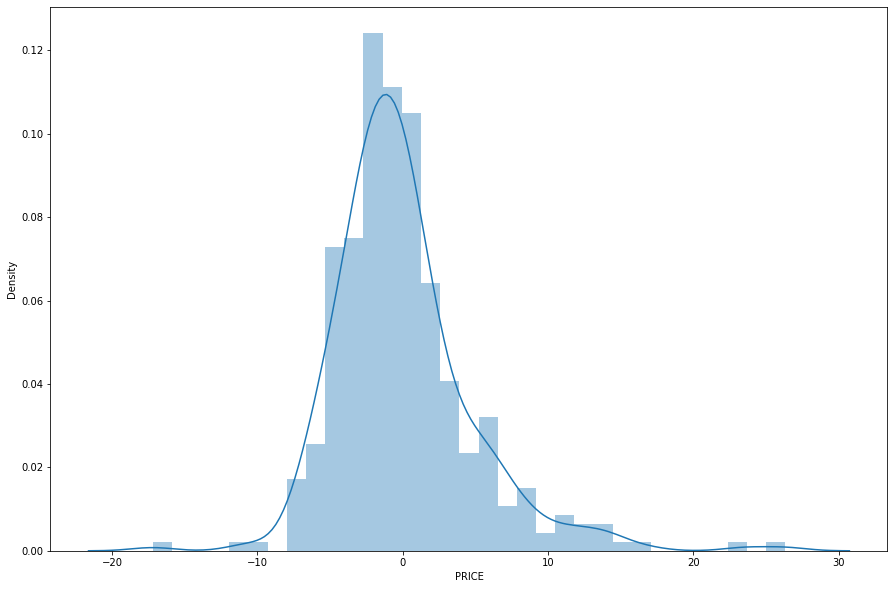

In [43]:
# Проверка нормальности ошибок
plt.figure(figsize=(15,10))
sns.distplot(y_train - y_pred)
plt.show()

#### Оценка точности модели

* 𝑅^2 : Это мера линейной зависимости между X и Y. Она интерпретируется как доля дисперсии в зависимой переменной, которая предсказуема по независимой переменной.

* Adjusted  𝑅^2 : Скорректированный R-квадрат сравнивает объясняющую силу регрессионных моделей, содержащих разное количество предикторов.

- Почему adj R^2 лучше: Эта статистика представляет собой обычный R-квадрат, но со штрафом за большое количество предикторов. Основная идея: если новые независимые переменные дают большой вклад в качество модели, значение этой статистики растет, если нет — то наоборот уменьшается.

* MAE : Это среднее значение абсолютного значения ошибок. Оно измеряет разницу между двумя непрерывными переменными (фактическими и прогнозируемыми значениями y.

* MSE: Это среднеквадратичная ошибка 

* RMSE: Это квадратный корень из среднеквадратичной ошибки

#### Оценка обучаемой выборки

In [44]:
print(y_pred[:5])

[25.28876411 23.70313309 22.15603301 21.26400891 16.81402917]


In [45]:
print('R^2:',metrics.r2_score(y_train, y_pred).round(2))
print('Adjusted R^2:', (1 - (1 - metrics.r2_score(y_train, y_pred)) * (len(y_train)-1) / (len(y_train) - X_train.shape[1]-1)).round(2))
print('MAE:',metrics.mean_absolute_error(y_train, y_pred))
print('MSE:',metrics.mean_squared_error(y_train, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

R^2: 0.74
Adjusted R^2: 0.73
MAE: 3.356826782168208
MSE: 22.545481487421423
RMSE: 4.748208239685937


#### Оценка тестовой выборки

In [46]:
y_test_pred = LR.predict(X_test)
print(y_test_pred[:5])

[28.64896005 36.49501384 15.4111932  25.40321303 18.85527988]


In [47]:
acc_linreg = metrics.r2_score(y_test, y_test_pred)
print('R^2:', acc_linreg.round(2))
print('Adjusted R^2:', (1 - (1-metrics.r2_score(y_test, y_test_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)).round(2))
print('MAE:',metrics.mean_absolute_error(y_test, y_test_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_test_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

R^2: 0.71
Adjusted R^2: 0.68
MAE: 3.1627098714573947
MSE: 21.51744423117709
RMSE: 4.638689926172808


### Получение данных для обучения и тестирования множественной регрессии (часть таблицы)
,где X - независимые факторы, а y - зависимый фактор

<AxesSubplot:>

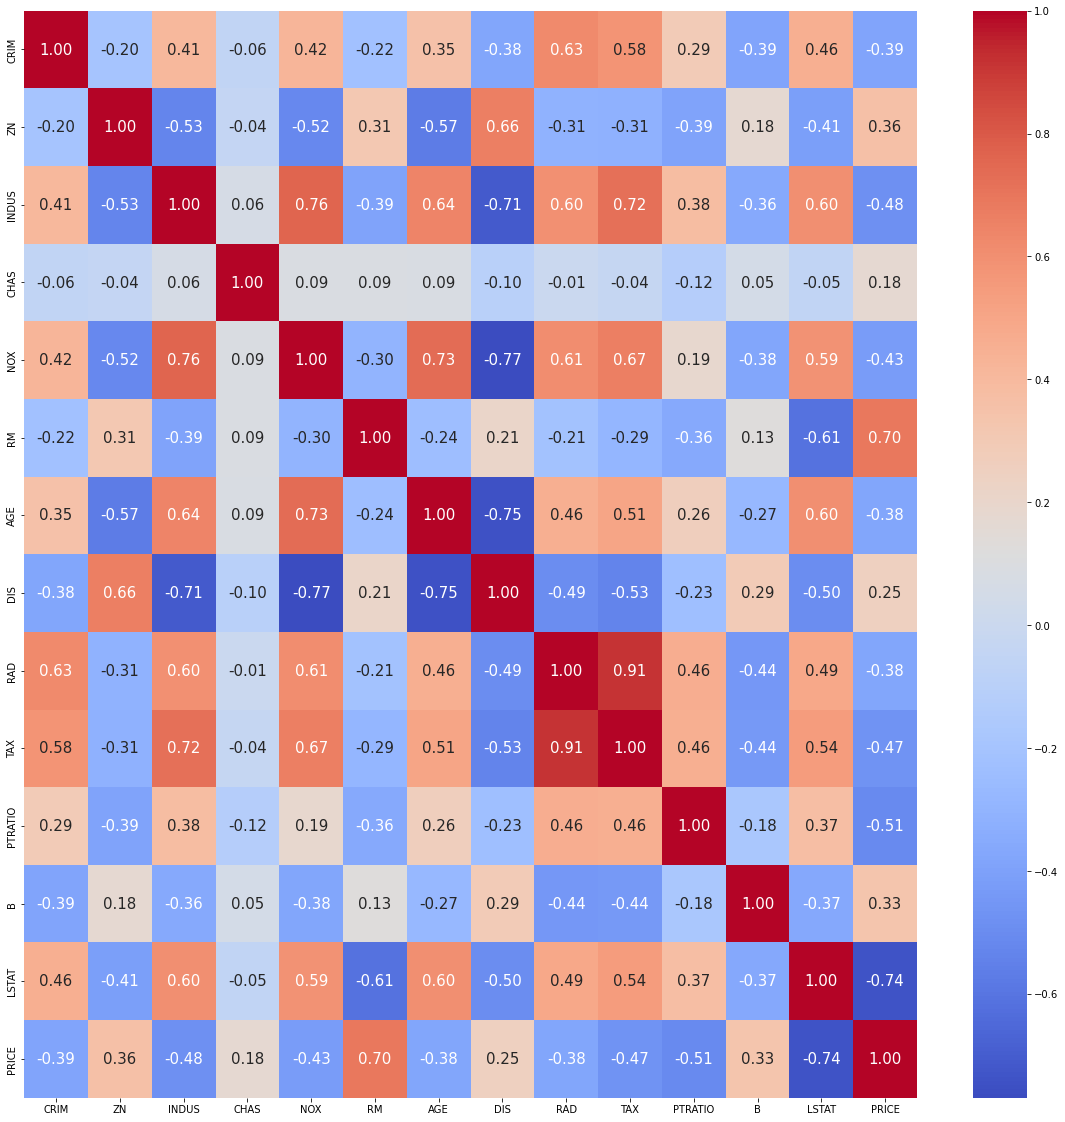

In [48]:
plt.figure(figsize=(20,20))
sns.heatmap(dfcor, cbar=True, fmt=".2f", annot=True, annot_kws={"size":15}, cmap="coolwarm")

In [49]:
# X = df.drop(["TAX", "RAD", "INDUS", "NOX", "LSTAT"], axis=1)
X_plr = df.drop(["LSTAT", "PRICE", "NOX", "INDUS", "TAX"], axis=1)
y_plr = df["PRICE"]

In [50]:
X_plr

,CRIM,ZN,CHAS,RM,AGE,DIS,RAD,PTRATIO,B
0,0.00632,18.0,0.0,6.575,65.2,4.0900,1.0,15.3,396.90
1,0.02731,0.0,0.0,6.421,78.9,4.9671,2.0,17.8,396.90
2,0.02729,0.0,0.0,7.185,61.1,4.9671,2.0,17.8,392.83
3,0.03237,0.0,0.0,6.998,45.8,6.0622,3.0,18.7,394.63
4,0.06905,0.0,0.0,7.147,54.2,6.0622,3.0,18.7,396.90
...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,0.0,6.593,69.1,2.4786,1.0,21.0,391.99
502,0.04527,0.0,0.0,6.120,76.7,2.2875,1.0,21.0,396.90
503,0.06076,0.0,0.0,6.976,91.0,2.1675,1.0,21.0,396.90
504,0.10959,0.0,0.0,6.794,89.3,2.3889,1.0,21.0,393.45


In [51]:
from sklearn.model_selection import train_test_split

X_train_plr, X_test_plr, y_train_plr, y_test_plr = train_test_split(X_plr, y_plr, test_size=0.3, random_state=42)

#### Обучение модели

In [52]:
from sklearn.linear_model import LinearRegression

LR_plr = LinearRegression()

LR_plr.fit(X_train_plr, y_train_plr)

LinearRegression()

In [53]:
print(X_train_plr.shape, y_train_plr.shape) # Размерность обучающей модели

print(X_test_plr.shape, y_test_plr.shape) # Размерность тестовой выборки

(354, 9) (354,)
(152, 9) (152,)


In [54]:
LR_plr.intercept_ # коэф смещения пересечения с осью y

-4.017938784926265

In [55]:
# Создадим датафрейм со всеми коэффициентами наклона
coevplr = pd.DataFrame([X_train_plr.columns, LR_plr.coef_]).T
coevplr = coevplr.rename(columns = {0: "Переменные", 1: "Коэффициенты"})
coevplr

,Переменные,Коэффициенты
0,CRIM,-0.153613
1,ZN,0.01838
2,CHAS,4.115445
3,RM,7.091984
4,AGE,-0.079911
5,DIS,-0.951717
6,RAD,-0.017168
7,PTRATIO,-0.811401
8,B,0.017426


In [56]:
coev

,Переменные,Коэффициенты
0,CRIM,-0.13347
1,ZN,0.035809
2,INDUS,0.049523
3,CHAS,3.119835
4,NOX,-15.417061
5,RM,4.057199
6,AGE,-0.010821
7,DIS,-1.385998
8,RAD,0.242727
9,TAX,-0.008702


#### Делаем прогноз

In [59]:
y_pred_plr = LR_plr.predict(X_train_plr)

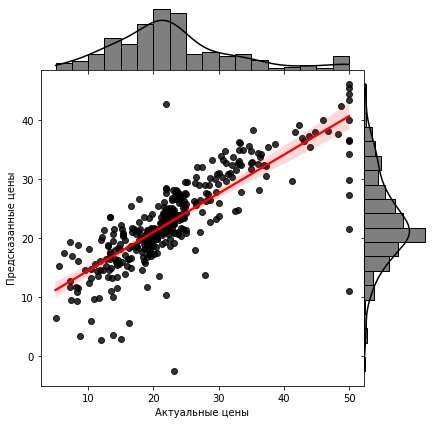

In [60]:
sns.jointplot(x = y_train_plr, y = y_pred_plr, data=X_train_plr, space = 0, kind='reg', color = "black", joint_kws={'line_kws':{'color':'red'}})
# подпишем оси координат
plt.xlabel("Актуальные цены")
plt.ylabel("Предсказанные цены")
plt.show()

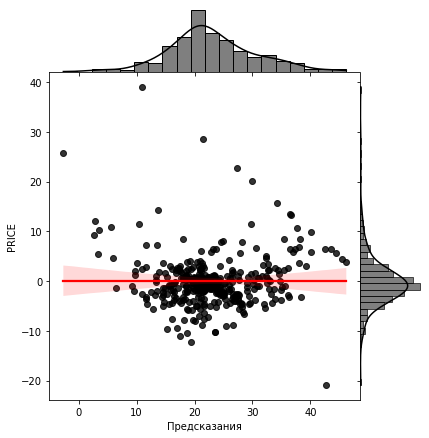

In [61]:
sns.jointplot(x = y_pred_plr, y = y_train_plr - y_pred_plr, data=X_train_plr, space = 0, kind='reg', color = "black", joint_kws={'line_kws':{'color':'red'}})
# подпишем оси координат
plt.title("Предсказания vs остатки")
plt.xlabel("Предсказания")
plt.show()

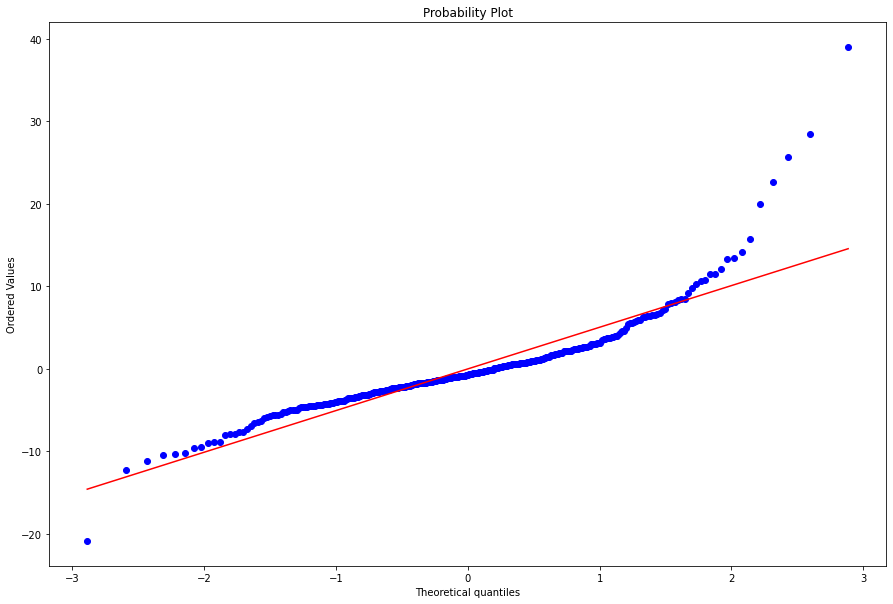

In [62]:
import scipy.stats as stats
import pylab 
plt.figure(figsize=(15,10))
stats.probplot(y_train_plr - y_pred_plr, dist="norm", plot=pylab)
pylab.show()

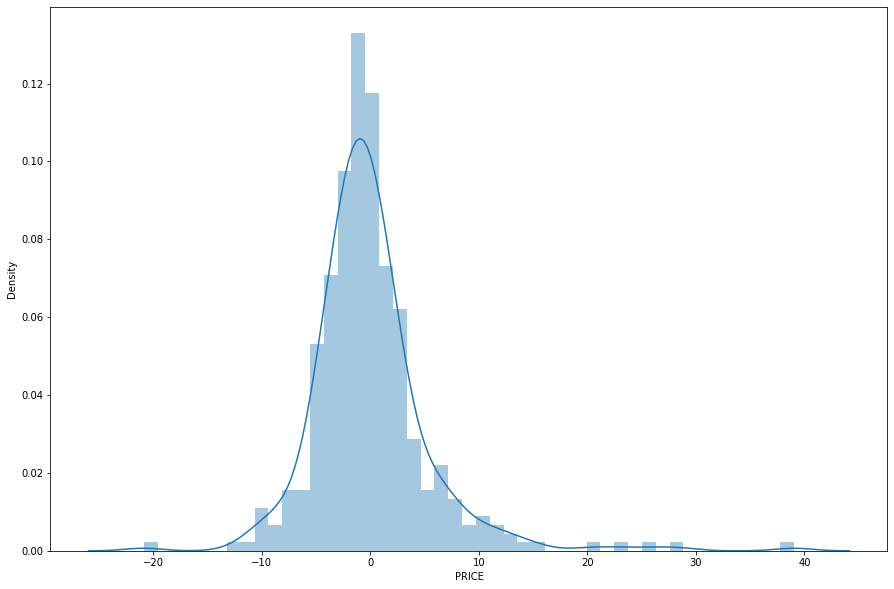

In [63]:
# Проверка нормальности ошибок
plt.figure(figsize=(15,10))
sns.distplot(y_train_plr - y_pred_plr)
plt.show()

#### Оценка точности модели

* 𝑅^2 : Это мера линейной зависимости между X и Y. Она интерпретируется как доля дисперсии в зависимой переменной, которая предсказуема по независимой переменной.

* Adjusted  𝑅^2 : Скорректированный R-квадрат сравнивает объясняющую силу регрессионных моделей, содержащих разное количество предикторов.

- Почему adj R^2 лучше: Эта статистика представляет собой обычный R-квадрат, но со штрафом за большое количество предикторов. Основная идея: если новые независимые переменные дают большой вклад в качество модели, значение этой статистики растет, если нет — то наоборот уменьшается.

* MAE : Это среднее значение абсолютного значения ошибок. Оно измеряет разницу между двумя непрерывными переменными (фактическими и прогнозируемыми значениями y.

* MSE: Это среднеквадратичная ошибка 

* RMSE: Это квадратный корень из среднеквадратичной ошибки

#### Оценка обучаемой выборки

In [64]:
print(y_pred_plr[:5])

[22.76174712 23.67767067 21.03790577 20.92131657 16.79807922]


In [65]:
print('R^2:',metrics.r2_score(y_train_plr, y_pred_plr).round(2))
print('Adjusted R^2:', (1 - (1 - metrics.r2_score(y_train_plr, y_pred_plr)) * (len(y_train_plr)-1) / (len(y_train_plr) - X_train_plr.shape[1]-1)).round(2))
print('MAE:',metrics.mean_absolute_error(y_train_plr, y_pred_plr))
print('MSE:',metrics.mean_squared_error(y_train_plr, y_pred_plr))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_train_plr, y_pred_plr)))

R^2: 0.66
Adjusted R^2: 0.65
MAE: 3.5451306468033486
MSE: 30.168105186427354
RMSE: 5.492549971227149


#### Оценка тестовой выборки

In [66]:
y_test_pred_plr = LR_plr.predict(X_test_plr)
print(y_test_pred_plr[:5])

[25.56783279 34.80876313 19.14413401 24.48983117 20.17679426]


In [68]:
acc_linreg = metrics.r2_score(y_test_plr, y_test_pred_plr)
print('R^2:', acc_linreg.round(2))
print('Adjusted R^2:', (1 - (1-metrics.r2_score(y_test_plr, y_test_pred_plr))*(len(y_test_plr)-1)/(len(y_test_plr)-X_test_plr.shape[1]-1)).round(2))
print('MAE:',metrics.mean_absolute_error(y_test_plr, y_test_pred_plr))
print('MSE:',metrics.mean_squared_error(y_test_plr, y_test_pred_plr))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test_plr, y_test_pred_plr)))

R^2: 0.63
Adjusted R^2: 0.6
MAE: 3.2908327291933173
MSE: 27.843023537665044
RMSE: 5.276648892778924
